<a href="https://www.kaggle.com/code/martaseidler/loan-status-prediction-84-acc?scriptVersionId=162387883" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Load libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_palette("Set2")

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv('/kaggle/input/loan-status-prediction/loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


## Analyze data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [7]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,381,376,381,373,381,360,381,381
unique,381,2,2,4,2,2,3,2
top,LP001003,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,291,228,234,278,325,149,271


In [8]:
df['Education'].value_counts()

Education
Graduate        278
Not Graduate    103
Name: count, dtype: int64

In [9]:
df['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [10]:
df['Credit_History'].unique()

array([ 1., nan,  0.])

In [11]:
df['Loan_Status_numeric'] = df['Loan_Status'].map({'Y': 1, 'N':0}).astype(int)

In [12]:
df[['Gender', 'Loan_Status_numeric']].groupby('Gender', as_index=False).mean()

,Gender,Loan_Status_numeric
0,Female,0.694118
1,Male,0.725086


In [13]:
df[['Married', 'Loan_Status_numeric']].groupby('Married', as_index=False).mean()

,Married,Loan_Status_numeric
0,No,0.660131
1,Yes,0.745614


In [14]:
df[['Dependents', 'Loan_Status_numeric']].groupby('Dependents', as_index=False).mean()

,Dependents,Loan_Status_numeric
0,0,0.717949
1,1,0.673077
2,2,0.745763
3,3+,0.714286


In [15]:
df[['Education', 'Loan_Status_numeric']].groupby('Education', as_index=False).mean()

,Education,Loan_Status_numeric
0,Graduate,0.726619
1,Not Graduate,0.669903


In [16]:
df[['Self_Employed', 'Loan_Status_numeric']].groupby('Self_Employed', as_index=False).mean()

,Self_Employed,Loan_Status_numeric
0,No,0.707692
1,Yes,0.685714


In [17]:
df[['Property_Area', 'Loan_Status_numeric']].groupby('Property_Area', as_index=False).mean()

,Property_Area,Loan_Status_numeric
0,Rural,0.613208
1,Semiurban,0.798658
2,Urban,0.690476


In [18]:
df[['Credit_History', 'Loan_Status_numeric']].groupby('Credit_History', as_index=False).mean()

,Credit_History,Loan_Status_numeric
0,0.0,0.052632
1,1.0,0.823129


## Data visualization

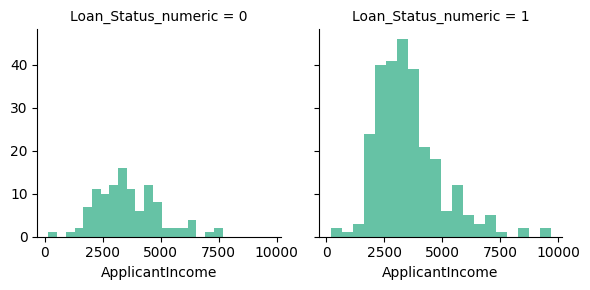

In [19]:
g = sns.FacetGrid(df, col='Loan_Status_numeric')
g.map(plt.hist, 'ApplicantIncome', bins=20)

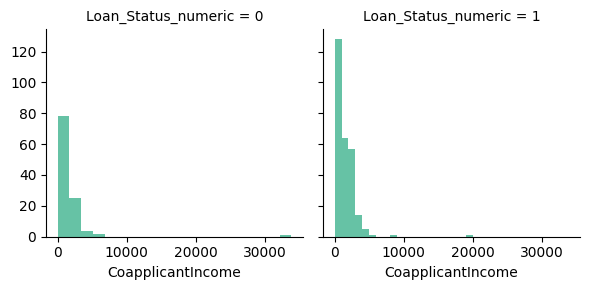

In [20]:
g = sns.FacetGrid(df, col='Loan_Status_numeric')
g.map(plt.hist, 'CoapplicantIncome', bins=20)

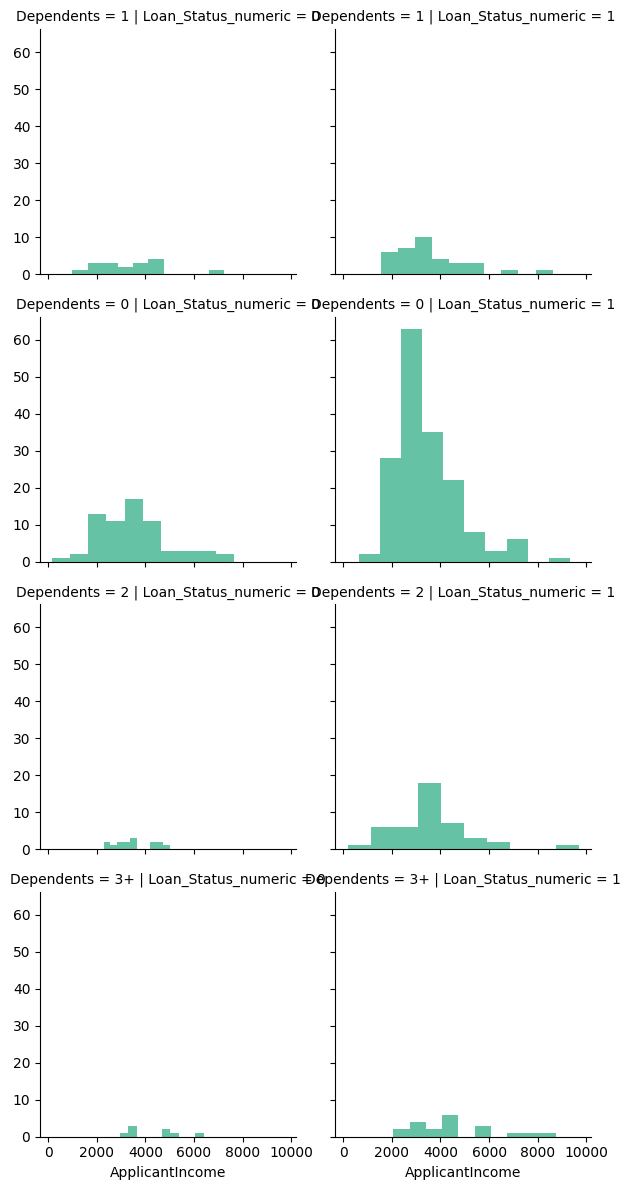

In [21]:
grid = sns.FacetGrid(df, col='Loan_Status_numeric', row='Dependents')
grid.map(plt.hist, 'ApplicantIncome')
grid.add_legend()

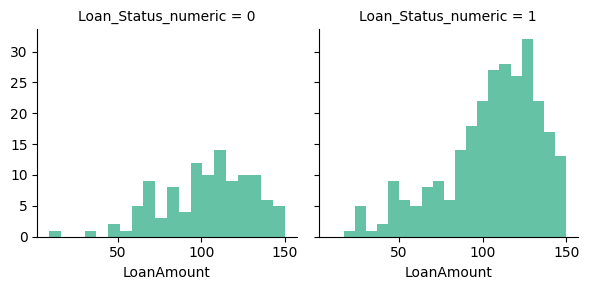

In [22]:
g = sns.FacetGrid(df, col='Loan_Status_numeric')
g.map(plt.hist, 'LoanAmount', bins=20)

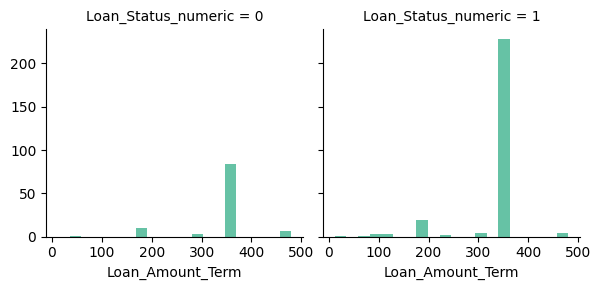

In [23]:
g = sns.FacetGrid(df, col='Loan_Status_numeric')
g.map(plt.hist, 'Loan_Amount_Term', bins=20)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


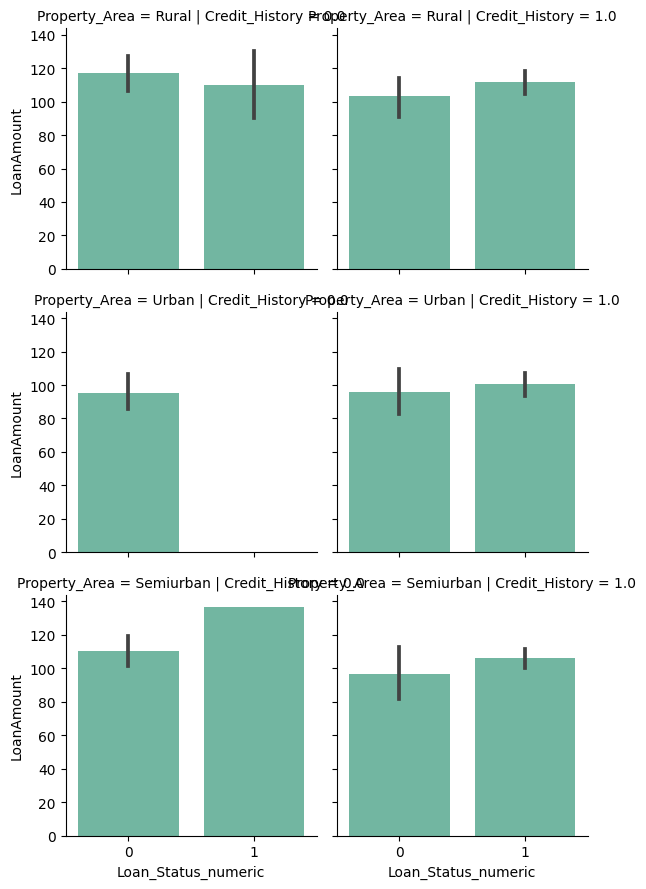

In [24]:
grid = sns.FacetGrid(df, row='Property_Area', col='Credit_History')
grid.map(sns.barplot, 'Loan_Status_numeric', 'LoanAmount')
grid.add_legend()

## Wrangle data

In [25]:
df = df.drop(['Loan_ID', 'Loan_Status'], axis=1)

In [26]:
df.rename(columns={'Loan_Status_numeric': 'Loan_Status'}, inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1


In [27]:
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0}).astype(int)

In [28]:
df['Dependents'] = df['Dependents'].replace(['0', '1', '2', '3+'], [0, 1, 2, 3])

/tmp/ipykernel_18/4079468563.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Dependents'] = df['Dependents'].replace(['0', '1', '2', '3+'], [0, 1, 2, 3])


In [29]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [30]:
df['Dependents'].value_counts()

Dependents
0.0    242
2.0     59
1.0     52
3.0     28
Name: count, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             376 non-null    object 
 1   Married            381 non-null    int64  
 2   Dependents         381 non-null    float64
 3   Education          381 non-null    object 
 4   Self_Employed      360 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   370 non-null    float64
 9   Credit_History     351 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 35.8+ KB


In [32]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             381 non-null    object 
 1   Married            381 non-null    int64  
 2   Dependents         381 non-null    float64
 3   Education          381 non-null    object 
 4   Self_Employed      381 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   381 non-null    float64
 9   Credit_History     381 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 35.8+ KB


In [34]:
df['Income_per_person'] = (df['ApplicantIncome'] + df['CoapplicantIncome'])/(1 + df['Married'] + df['Dependents'])

In [35]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_per_person
0,Male,1,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,2030.333333
1,Male,1,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,1500.000000
2,Male,1,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,2470.500000
3,Male,0,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.000000
4,Male,1,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1,1924.500000


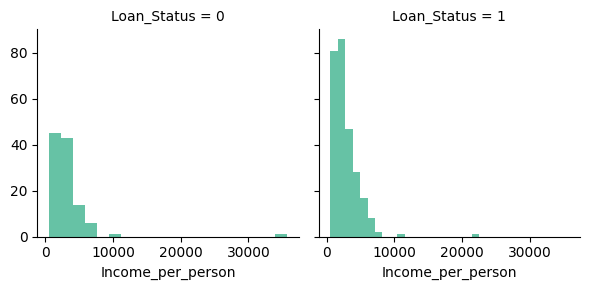

In [36]:
g = sns.FacetGrid(df, col='Loan_Status')
g.map(plt.hist, 'Income_per_person', bins=20)

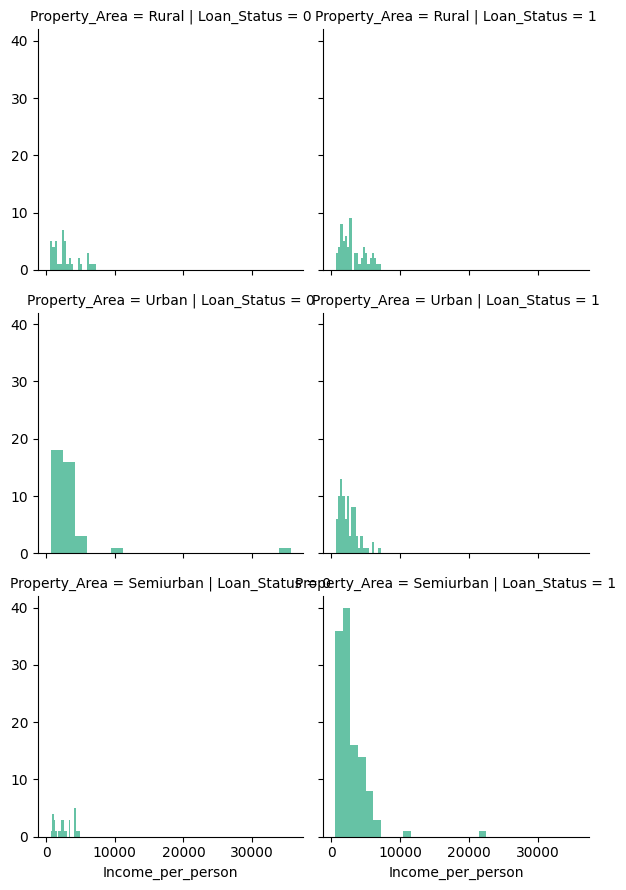

In [37]:
grid = sns.FacetGrid(df, row='Property_Area', col='Loan_Status')
grid.map(plt.hist, 'Income_per_person', bins=20)
grid.add_legend()

In [38]:
df['Property_Area'] = df['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2}).astype(int)
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1}).astype(int)
df['Education'] = df['Education'].map({'Not Graduate': 0, 'Graduate': 1}).astype(int)
df['Self_Employed'] = df['Self_Employed'].map({'No': 0, 'Yes': 1}).astype(int)

In [39]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_per_person
0,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,0,2030.333333
1,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,2,1,1500.000000
2,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,2470.500000
3,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,2,1,6000.000000
4,1,1,0.0,0,0,2333,1516.0,95.0,360.0,1.0,2,1,1924.500000


## Model and prediction

In [40]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [41]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income_per_person
0,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,2030.333333
1,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,2,1500.000000
2,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,2,2470.500000
3,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,2,6000.000000
4,1,1,0.0,0,0,2333,1516.0,95.0,360.0,1.0,2,1924.500000


In [42]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             381 non-null    int64  
 1   Married            381 non-null    int64  
 2   Dependents         381 non-null    float64
 3   Education          381 non-null    int64  
 4   Self_Employed      381 non-null    int64  
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   381 non-null    float64
 9   Credit_History     381 non-null    float64
 10  Property_Area      381 non-null    int64  
 11  Loan_Status        381 non-null    int64  
 12  Income_per_person  381 non-null    float64
dtypes: float64(6), int64(7)
memory usage: 38.8 KB


In [44]:
def get_score(model):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    return round(scores.mean() * 100, 2)

In [45]:
acc_log = get_score(LogisticRegression(max_iter=1000))

In [46]:
acc_svc = get_score(SVC())

In [47]:
acc_knn = get_score(KNeighborsClassifier(n_neighbors=3))

In [48]:
acc_gaussian = get_score(GaussianNB())

In [49]:
acc_perceptron = get_score(Perceptron())

In [50]:
acc_sgd = get_score(SGDClassifier())

In [51]:
acc_decision_tree = get_score(DecisionTreeClassifier())

In [52]:
acc_random_forest = get_score(RandomForestClassifier(n_estimators=100))

In [53]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Descent', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron, acc_sgd, acc_decision_tree]
})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,84.25
3,Random Forest,83.99
4,Naive Bayes,83.99
7,Decision Tree,78.22
0,Support Vector Machines,71.13
6,Stochastic Gradient Descent,67.71
1,KNN,65.62
5,Perceptron,50.41
